In [2]:
!pip install ipython-sql wordcloud

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
%load_ext sql

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

# We love acronyms
and [worldcloud](https://www.datacamp.com/community/tutorials/wordcloud-python)

In [5]:
acronyms=pd.read_csv('datasets/db_acronyms.txt')

In [6]:
acronyms.head()

,acronym,definition
0,SQL,Structured Query Language
1,CRUD,Create Read Update Delete
2,BLOB,Binary Large OBject
3,CLOB,Character Large OBject
4,PK,Primary Key


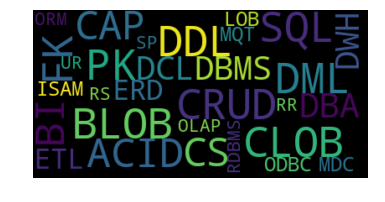

In [8]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(" ".join(acronyms['acronym']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

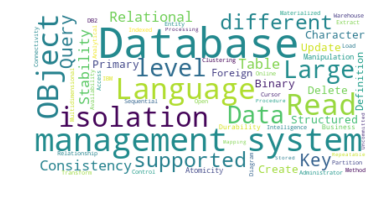

In [8]:
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(acronyms['definition']))
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

# ACID
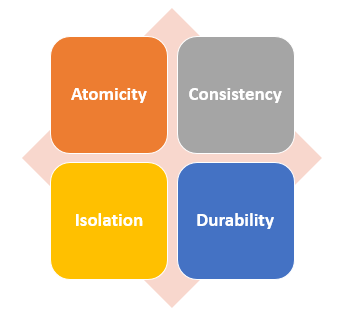

## Atomicity
> Atomicity means that you guarantee that either all of the transaction succeeds or none of it does. You don’t get part of it succeeding and part of it not. If one part of the transaction fails, the whole transaction fails. With atomicity, it’s either “all or nothing”.

## Consistency
> This ensures that you guarantee that all data will be consistent. All data will be valid according to all defined rules, including any constraints, cascades, and triggers that have been applied on the database.

## Isolation
> Guarantees that all transactions will occur in isolation. No transaction will be affected by any other transaction. So a transaction cannot read data from any other transaction that has not yet completed.

## Durability
> Durability means that, once a transaction is committed, it will remain in the system – even if there’s a system crash immediately following the transaction. Any changes from the transaction must be stored permanently. If the system tells the user that the transaction has succeeded, the transaction must have, in fact, succeeded.

![Image](images/sqlite.gif)

SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine.

SQLite is the most used database engine in the world. SQLite is built into all mobile phones and most computers and comes bundled inside countless other applications that people use every day. More Information...

The SQLite file format is stable, cross-platform, and backwards compatible and the developers pledge to keep it that way through at least the year 2050. SQLite database files are commonly used as containers to transfer rich content between systems and as a long-term archival format for data.

There are over 1 trillion (1e12) SQLite databases in active use.

SQLite is not directly comparable to client/server SQL database engines such as MySQL, Oracle, PostgreSQL, or SQL Server since SQLite is trying to solve a different problem.

People who understand SQL can employ the sqlite3 command-line shell (or various third-party SQLite access programs) to analyze large datasets. Raw data can be imported from CSV files, then that data can be sliced and diced to generate a myriad of summary reports. 

More complex analysis can be done using simple scripts written in Tcl or Python (both of which come with SQLite built-in) or in R or other languages using readily available adaptors. Possible uses include website log analysis, sports statistics analysis, compilation of programming metrics, and analysis of experimental results. Many bioinformatics researchers use SQLite in this way.

The same thing can be done with an enterprise client/server database, of course. The advantage of SQLite is that it is easier to install and use and the resulting database is a single file that can be written to a USB memory stick or emailed to a colleague.

# SQL (Structured Query Language)
Domain-specific language used in programming and designed for managing data held in a relational database management system (RDBMS)

it is particularly useful in handling structured data, i.e. data incorporating relations among entities and variables.

The scope of SQL includes data query, data manipulation (insert, update and delete), data definition (schema creation and modification), and data access control. 

SQL consists in 
- data definition language (DDL)
- data query language (DQL)
- data control language (DCL)
- data manipulation language (DML)

In [10]:
%sql sqlite:///datasets/myseconddb.db

'Connected: @datasets/myseconddb.db'

# Data Definition Language (DDL)
Subset of commands used to define/modify objects in a database (CREATE, DROP, ALTER, TRUNCATE)

## Create a table

`CREATE TABLE [table name] ( [column definitions] ) [table parameters]`

In [17]:
%sql CREATE TABLE IF NOT EXISTS upa_master_students(id INTEGER PRIMARY KEY,name TEXT,surname TEXT,company_id NUMERIC)

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


[]

In [14]:
%sql CREATE table IF NOT EXISTS upa_companies(id INTEGER PRIMARY KEY, name TEXT)

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


[]

## Drop a table

`DROP TABLE [table name]`

In [16]:
%sql DROP TABLE upa_master_students

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


[]

# Alter a table 

`ALTER objecttype objectname parameters.`

In [19]:
%sql ALTER TABLE upa_master_students ADD column email TEXT 

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
(sqlite3.OperationalError) duplicate column name: email [SQL: 'ALTER TABLE upa_master_students ADD column email TEXT'] (Background on this error at: http://sqlalche.me/e/e3q8)


# Let's give a look 

In [20]:
%sql SELECT * FROM sqlite_master WHERE type='table'

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


type,name,tbl_name,rootpage,sql
table,upa_companies,upa_companies,3,"CREATE TABLE upa_companies(id INTEGER PRIMARY KEY, name TEXT)"
table,upa_master_students,upa_master_students,2,"CREATE TABLE upa_master_students(id INTEGER PRIMARY KEY,name TEXT,surname TEXT,company_id NUMERIC, email TEXT)"


# Data Manipulation Language (DML)
Subset of commands used to insert/update/delete objects in a database (INSERT, DELETE, UPDATE)

# INSERT
`INSERT INTO [table name](columns) values (value)`

In [28]:
%sql INSERT INTO upa_companies(name) VALUES ('GFK'),('Valsoia')


   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
2 rows affected.


[]

# All fine ?

In [30]:
%sql select * from upa_companies;

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


id,name
1,Neodata Group
2,GFK
3,Valsoia


In [39]:
%sql INSERT INTO upa_master_students(name,surname,email, company_id) values ('Slavo','Nicotra','salvo.nicotra@neodatagroup.com', 1)

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
1 rows affected.


[]

# UPDATE
`UPDATE [table name] set values WHERE conditions`

In [41]:
%sql select * from upa_master_students 

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


id,name,surname,company_id,email
1,Slavo,NICOTRA,1,nics@neodatagroup.com


In [40]:
%sql UPDATE upa_master_students set email='nics@neodatagroup.com',surname='NICOTRA' where id=1

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
1 rows affected.


[]

In [ ]:
# DELETE
`DELETE from [table name] WHERE conditions`

In [37]:
%sql DELETE from upa_master_students where id=1;

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
1 rows affected.


[]

# Data Query Language (DQL)

# SELECT
``` SELECT [ ALL | DISTINCT |  TOP ] columns
FROM table
[ WHERE conditions ]
[ GROUP BY columns [HAVING conditions] ]
[ ORDER BY columns ];
```

# Where and order

In [45]:
%sql INSERT INTO upa_master_students(name,surname,email, company_id) values ('Harry','Potter','harry@howarts.com', 1)

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
1 rows affected.


[]

In [49]:
%sql select * from upa_master_students order by name desc

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


id,name,surname,company_id,email
1,Slavo,NICOTRA,1,nics@neodatagroup.com
2,Harry,Potter,1,harry@howarts.com


# Join

In [52]:
%sql select uc.name as company_name, ums.name, surname, email from upa_master_students ums join upa_companies uc on ums.company_id=uc.id

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


company_name,name,surname,email
Neodata Group,Slavo,NICOTRA,nics@neodatagroup.com
Neodata Group,Harry,Potter,harry@howarts.com


# Group By

In [53]:
%sql select uc.name,count(*) from upa_master_students ums join upa_companies uc on ums.company_id=uc.id group by uc.name

   sqlite:///datasets/myfirstdb.db
 * sqlite:///datasets/myseconddb.db
Done.


name,count(*)
Neodata Group,2


# Having 